In [1]:
import pandas as pd
col_names = ['스트레스', '스트레스남학생', '스트레스여학생', '우울감경험률', '우울남학생', '우울여학생', '자살생각율', '자살남학생', '자살여학생']
raw_data = pd.read_excel("./src/teenage_mental.xls", header=1, usecols="B:J", names=col_names)
raw_data.loc[1] = 100. - raw_data.loc[0]
raw_data['응답'] = ['그렇다', '아니다']
raw_data.set_index('응답', drop=True, inplace=True)

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# f_path = "/Library/Fonts/AppleGothic.ttf"
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [2]:
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,43.5,38.8,48.6,30.2,25.5,35.1,15.8,11.9,19.9
아니다,56.5,61.2,51.4,69.8,74.5,64.9,84.2,88.1,80.1


다시 우리의 데이터를 들여다보자. 우리의 데이터는 '그렇다', '아니다'로 구분되어 있다. 그러므로 파이(pie) 그래프가 좋을 것 같다.

<AxesSubplot:ylabel='스트레스'>

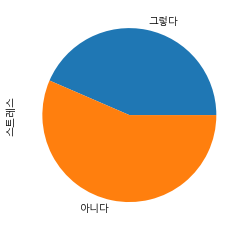

In [3]:
raw_data['스트레스'].plot.pie()

Pandas는 옵션처럼 바로 plot을 지원한다. 위 그림을 보면,스트레스를 받아본 경험이 있다고 응답한 10대를 쉽게 구분할 수 있다.

<AxesSubplot:ylabel='스트레스'>

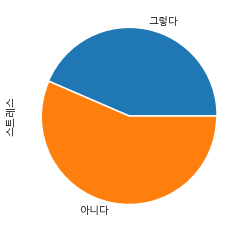

In [5]:
raw_data['스트레스'].plot.pie(explode=[0, 0.02])

explode 옵션을 사용하면 파이 그래프의 항목 사이를 원점으로부터 떨어뜨려 준다.

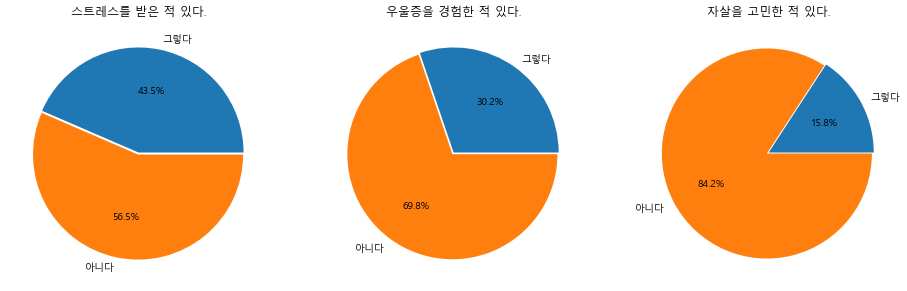

In [7]:
f, ax = plt.subplots(1, 3, figsize=(16, 8))
raw_data['스트레스'].plot.pie(explode=[0, 0.02], ax = ax[0], autopct='%1.1f%%')
ax[0].set_title('스트레스를 받은 적 있다.')
ax[0].set_ylabel('')

raw_data['우울감경험률'].plot.pie(explode=[0, 0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('우울증을 경험한 적 있다.')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode=[0, 0.02], ax=ax[2], autopct='%1.1f%%')
ax[2].set_title('자살을 고민한 적 있다.')
ax[2].set_ylabel('')

plt.show()

갑자기 복잡한 코드가 나왔다고 놀라지 않아도 된다. 하나씩 천천히 보자.  
```
f, ax = plt.subplots(1, 3, figsize=(16,8))
```
이 코드는 1행 3열로 plot을 배치한다는 의미와 전체 그림의 크기를 설정하는 옵션을 줄 수 있다.  
matplotlib.pyplot.subplots는 figure와 axes 오브젝트를 반환하는데, 위 코드처럼 f, ax로 받으면, figure와 axes의 속성을 하나하나 지정할 수 있다.  
특히 subplot으로 3개를 그리겠다고 했기 때문에, ax는 ax[0], ax[1], ax[2]까지 속성을 각각 지정할 수 있다.  
그래서 set_title, set_ylabel를 각각 제목과 y라벨을 지정해서 그릴 수 있다.  
위 코드의 결과를 보면, 서울시의 10대들 중 몇 %나 스트레스를 받은적 있다고 응답했는지를 알 수 있으며, 우울증을 경험한 적 있는 10대와 자살을 고민한 10대의 비율도 알 수 있다.